### 1. EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify as sq
import plotly.express as px
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
df=pd.read_csv('top10s.csv',encoding='ISO-8859-1')
df[:10]

title         artist        top_genre  \
0                            Hey, Soul Sister          Train       neo mellow   
1                        Love The Way You Lie         Eminem  detroit hip hop   
2                                     TiK ToK          Kesha        dance pop   
3                                 Bad Romance      Lady Gaga        dance pop   
4                        Just the Way You Are     Bruno Mars              pop   
5                                        Baby  Justin Bieber     canadian pop   
6                                    Dynamite      Taio Cruz        dance pop   
7                                     Secrets    OneRepublic        dance pop   
8  Empire State of Mind (Part II) Broken Down    Alicia Keys          hip pop   
9                    Only Girl (In The World)        Rihanna    barbadian pop   

   year  bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop  
0  2010   97    89    67  -4     8   80  217     19     4   83  
1  2010   87    93    75  -5    52   64  263     24    23   82  
2  2010  120    84    76  -3    29   71  200     10    14   80  
3  2010  119    92    70  -4     8   71  295      0     4   79  
4  2010  109    84    64  -5     9   43  221      2     4   78  
5  2010   65    86    73  -5    11   54  214      4    14   77  
6  2010  120    78    75  -4     4   82  203      0     9   77  
7  2010  148    76    52  -6    12   38  225      7     4   77  
8  2010   93    37    48  -8    12   14  216     74     3   76  
9  2010  126    72    79  -4     7   61  235     13     4   73

In [3]:
# check if there is any null number
df.isnull().sum()

title        0
artist       0
top_genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [4]:
# The datatypes of the different attributes of the dataset
print(df.dtypes)

title        object
artist       object
top_genre    object
year          int64
bpm           int64
nrgy          int64
dnce          int64
dB            int64
live          int64
val           int64
dur           int64
acous         int64
spch          int64
pop           int64
dtype: object


In [5]:
genre_list=df['top_genre'].values.tolist()
print(set(genre_list))

{'candy pop', 'brostep', 'british soul', 'latin', 'edm', 'hollywood', 'chicago rap', 'canadian contemporary r&b', 'neo mellow', 'australian pop', 'downtempo', 'acoustic pop', 'black americana', 'french indie pop', 'electronic trap', 'alternative r&b', 'indie pop', 'hip pop', 'electro house', 'barbadian pop', 'metropopolis', 'alt z', 'nz pop', 'cali rap', 'folk-pop', 'contemporary country', 'ohio hip hop', 'big room', 'house', 'canadian latin', 'australian hip hop', 'belgian edm', 'canadian hip hop', 'irish singer-songwriter', 'electro', 'australian country', 'detroit hip hop', 'tropical house', 'rap', 'lgbtq+ hip hop', 'colombian pop', 'baroque pop', 'boy band', 'complextro', 'alaska indie', 'danish pop', 'pop', 'canadian pop', 'moroccan pop', 'atl hip hop', 'electropop', 'permanent wave', 'australian dance', 'celtic rock', 'art pop', 'hip hop', 'escape room', 'dance pop', 'bedroom soul'}


In [6]:
#Calculating the number of songs of each genre
popular_genre=df.groupby('top_genre')['top_genre'] \
                .count() \
                .reset_index(name='count') \
                .sort_values(['count'], ascending=False) \
                [:10]
print(popular_genre)

                    top_genre  count
30                  dance pop    362
56                        pop     75
23               canadian pop     41
16                   boy band     16
10              barbadian pop     15
38                 electropop     15
20  canadian contemporary r&b     14
4                     art pop     13
14                   big room     10
17               british soul     10


Text(0.5, 1.0, 'Top 10 genre of 2010-2021')

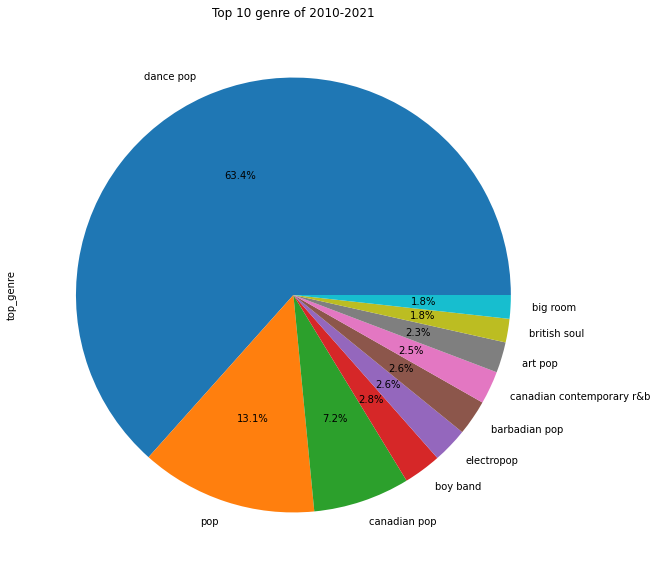

In [7]:
df['top_genre'].value_counts().head(10).plot.pie(figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 genre of 2010-2021')

In [8]:
df['artist'].nunique()

214

In [9]:
artist_list=df['artist'].values.tolist()
print(set(artist_list))

{'Mabel', 'Christina Perri', 'Justin Timberlake', 'MAGIC!', 'fun.', 'Pitbull', 'Sia', 'Katy Perry', 'T.I.', 'Megan Thee Stallion', 'BENEE', 'Little Mix', 'Kali Uchis', 'Sean Kingston', 'Carly Rae Jepsen', 'SZA', 'Mr. Probz', 'Enrique Iglesias', 'Ciara', 'Far East Movement', 'Justin Bieber', 'Alessia Cara', 'Passenger', 'Robin Thicke', 'SHAED', 'Rihanna', 'Beyonc', 'Hailee Steinfeld', 'Blake Shelton', 'Dan + Shay', 'Naughty Boy', 'Kesha', 'Usher', 'Lil Nas X', 'Kanye West', 'Lily Allen', 'DJ Snake', 'Giveon', 'Hot Chelle Rae', 'Iggy Azalea', 'Calvin Harris', 'Bebe Rexha', 'Lukas Graham', 'Michael Jackson', 'Jonas Blue', 'CNCO', 'The Black Eyed Peas', 'Ed Sheeran', 'Ricky Martin', 'Jason Derulo', 'BORNS', 'R3HAB', 'Ava Max', 'Ne-Yo', 'Train', 'Jawsh 685', 'DJ Khaled', 'Dua Lipa', 'Zara Larsson', 'Florence + The Machine', 'Jewel', 'Fergie', 'The Kid LAROI', 'Kygo', 'Miley Cyrus', 'Ellie Goulding', 'Mark Ronson', 'Maroon 5', 'Olivia Rodrigo', 'Alan Walker', 'Joey Montana', 'Rita Ora', 'Swe

In [10]:
pd.set_option('precision', 3)
df.describe()

year      bpm     nrgy     dnce       dB     live      val  \
count   696.000  696.000  696.000  696.000  696.000  696.000  696.000   
mean   2015.391  119.217   69.154   64.927   -5.621   17.687   51.907   
std       3.167   24.886   16.352   13.363    1.773   12.992   22.250   
min    2010.000   43.000    4.000   23.000  -15.000    2.000    4.000   
25%    2013.000  100.000   59.000   57.000   -7.000    9.000   35.000   
50%    2015.000  120.000   72.000   67.000   -5.000   12.000   52.000   
75%    2018.000  130.000   81.000   74.000   -4.000   23.250   68.000   
max    2021.000  206.000   98.000   97.000   -2.000   74.000   98.000   

           dur    acous     spch      pop  
count  696.000  696.000  696.000  696.000  
mean   220.810   15.716    8.557   68.401  
std     35.308   21.719    7.676   14.231  
min    115.000    0.000    3.000    0.000  
25%    199.000    2.000    4.000   62.000  
50%    217.000    7.000    6.000   71.000  
75%    236.250   20.000    9.250   78.000  
max    424.000   99.000   48.000   99.000

In [11]:
popular_artist=df.groupby('artist')['artist'] \
                .count()\
                .reset_index(name='count')\
                .sort_values(['count'], ascending=False)\
                [:10]
print(popular_artist)

            artist  count
98   Justin Bieber     22
103     Katy Perry     17
135       Maroon 5     17
167        Rihanna     15
112      Lady Gaga     15
26      Bruno Mars     14
10   Ariana Grande     13
53      Ed Sheeran     12
181   Shawn Mendes     12
163        Pitbull     11


<AxesSubplot:>

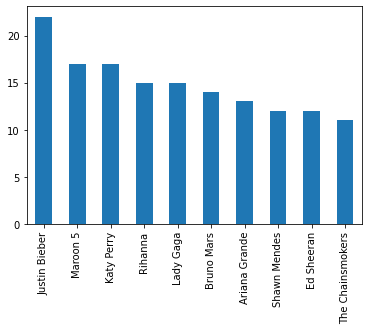

In [12]:
df['artist'].value_counts().head(10).plot.bar()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'bpm'}>,
        <AxesSubplot:title={'center':'nrgy'}>],
       [<AxesSubplot:title={'center':'dnce'}>,
        <AxesSubplot:title={'center':'dB'}>,
        <AxesSubplot:title={'center':'live'}>],
       [<AxesSubplot:title={'center':'val'}>,
        <AxesSubplot:title={'center':'dur'}>,
        <AxesSubplot:title={'center':'acous'}>],
       [<AxesSubplot:title={'center':'spch'}>,
        <AxesSubplot:title={'center':'pop'}>, <AxesSubplot:>]],
      dtype=object)

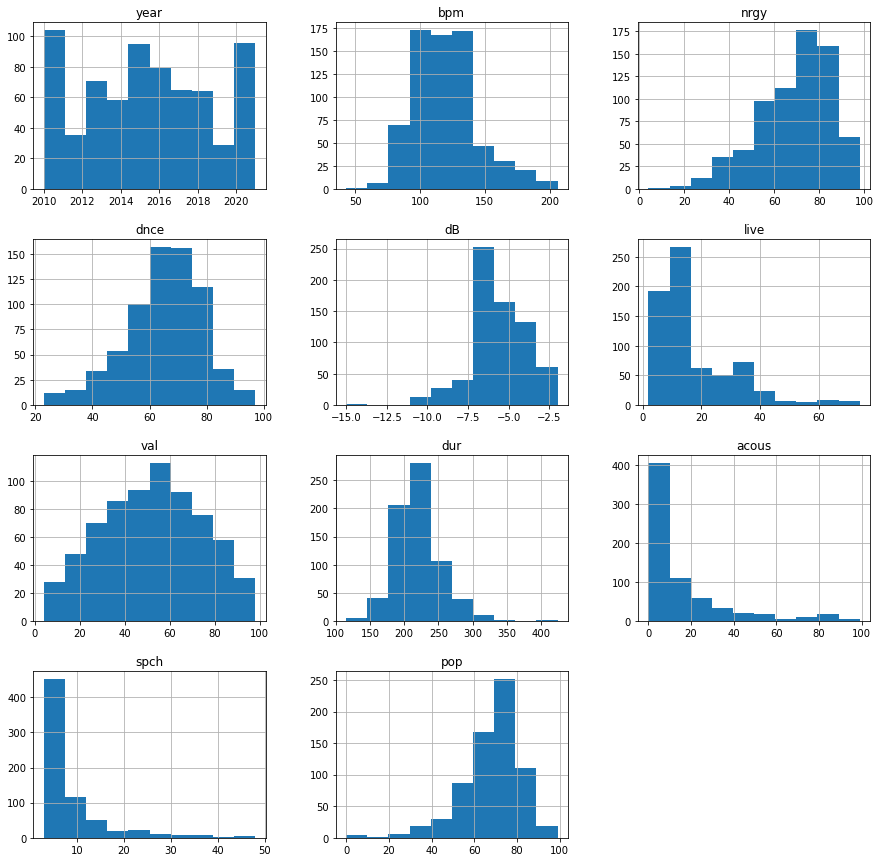

In [13]:
# Show histograms for all variables¶
df.hist(figsize= [15, 15])

In [14]:
#Variable relationships
fig = px.scatter(df,x='dB', y='nrgy',color='nrgy',hover_name='title',hover_data=['artist','year'],title='Relationship loudness and energy')
fig.show()

fig = px.scatter(df,x='dnce', y='bpm',color='bpm',hover_name='title',hover_data=['artist','year'], title='Relationship Danceability and bpm')
fig.show()

fig = px.scatter(df,x='dnce', y='val',color='val',hover_name='title',hover_data=['artist','year'],title='Relationship Danceability and valence')
fig.show()

Text(0.5, 1.0, 'Genre vs Count of the tracks')

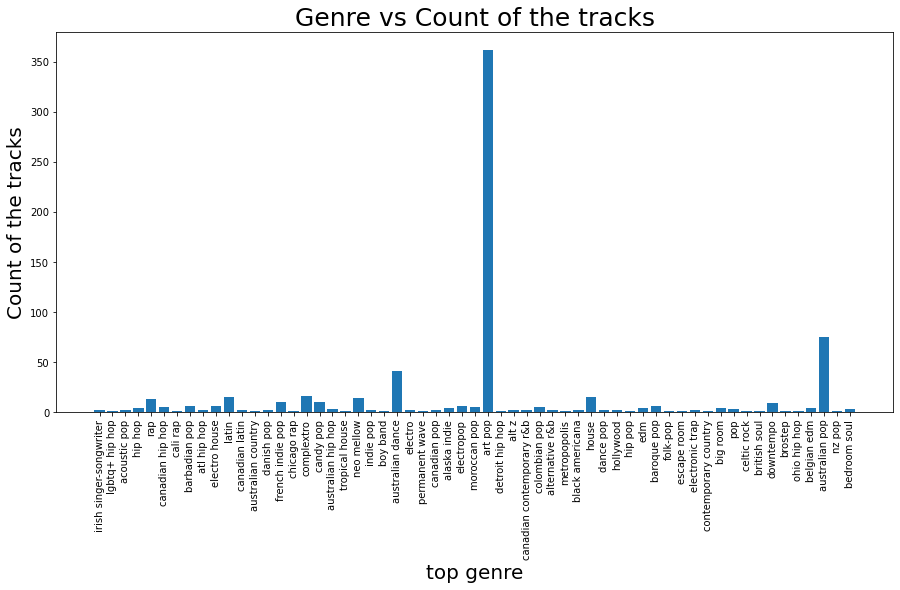

In [15]:
xtick = ['irish singer-songwriter', 'lgbtq+ hip hop', 'acoustic pop', 'hip hop', 'rap', 'canadian hip hop', 
         'cali rap', 'barbadian pop', 'atl hip hop', 'electro house', 'latin', 'canadian latin', 
         'australian country', 'danish pop', 'french indie pop', 'chicago rap', 'complextro', 'candy pop', 
         'australian hip hop', 'tropical house', 'neo mellow', 'indie pop', 'boy band', 'australian dance', 
         'electro', 'permanent wave', 'canadian pop', 'alaska indie', 'electropop', 'moroccan pop', 
         'art pop', 'detroit hip hop', 'alt z', 'canadian contemporary r&b', 'colombian pop', 'alternative r&b', 
         'metropopolis', 'black americana', 'house', 'dance pop', 'hollywood', 'hip pop', 'edm', 'baroque pop', 
         'folk-pop', 'escape room', 'electronic trap', 'contemporary country', 'big room', 'pop', 'celtic rock', 
         'british soul', 'downtempo', 'brostep', 'ohio hip hop', 'belgian edm', 'australian pop', 'nz pop', 
         'bedroom soul']
length = np.arange(len(xtick))
genre_groupby = df.groupby('top_genre')['title'].agg(len)
genre_groupby
plt.figure(figsize = (15,7))
plt.bar(length, genre_groupby)
plt.xticks(length,xtick)
plt.xticks(rotation = 90)
plt.xlabel('top genre', fontsize = 20)
plt.ylabel('Count of the tracks', fontsize = 20)
plt.title('Genre vs Count of the tracks', fontsize = 25)

In [16]:
correlation=df.corr(method='spearman')
print(correlation)

        year    bpm   nrgy   dnce     dB   live    val    dur  acous   spch  \
year   1.000 -0.101 -0.330  0.117 -0.252 -0.097 -0.125 -0.328  0.234  0.082   
bpm   -0.101  1.000  0.124 -0.074  0.081  0.046  0.022  0.004 -0.164  0.063   
nrgy  -0.330  0.124  1.000  0.009  0.665  0.135  0.362 -0.052 -0.402  0.171   
dnce   0.117 -0.074  0.009  1.000  0.066 -0.107  0.470 -0.205 -0.124  0.113   
dB    -0.252  0.081  0.665  0.066  1.000  0.055  0.317 -0.104 -0.241  0.022   
live  -0.097  0.046  0.135 -0.107  0.055  1.000 -0.054  0.072 -0.041  0.109   
val   -0.125  0.022  0.362  0.470  0.317 -0.054  1.000 -0.233 -0.189  0.161   
dur   -0.328  0.004 -0.052 -0.205 -0.104  0.072 -0.233  1.000  0.016 -0.091   
acous  0.234 -0.164 -0.402 -0.124 -0.241 -0.041 -0.189  0.016  1.000 -0.029   
spch   0.082  0.063  0.171  0.113  0.022  0.109  0.161 -0.091 -0.029  1.000   
pop    0.432 -0.025 -0.213  0.106 -0.114 -0.081 -0.006 -0.163  0.157 -0.010   

         pop  
year   0.432  
bpm   -0.025  
nrgy  

Text(0.5, 1.0, 'Artist Name vs Count of songs')

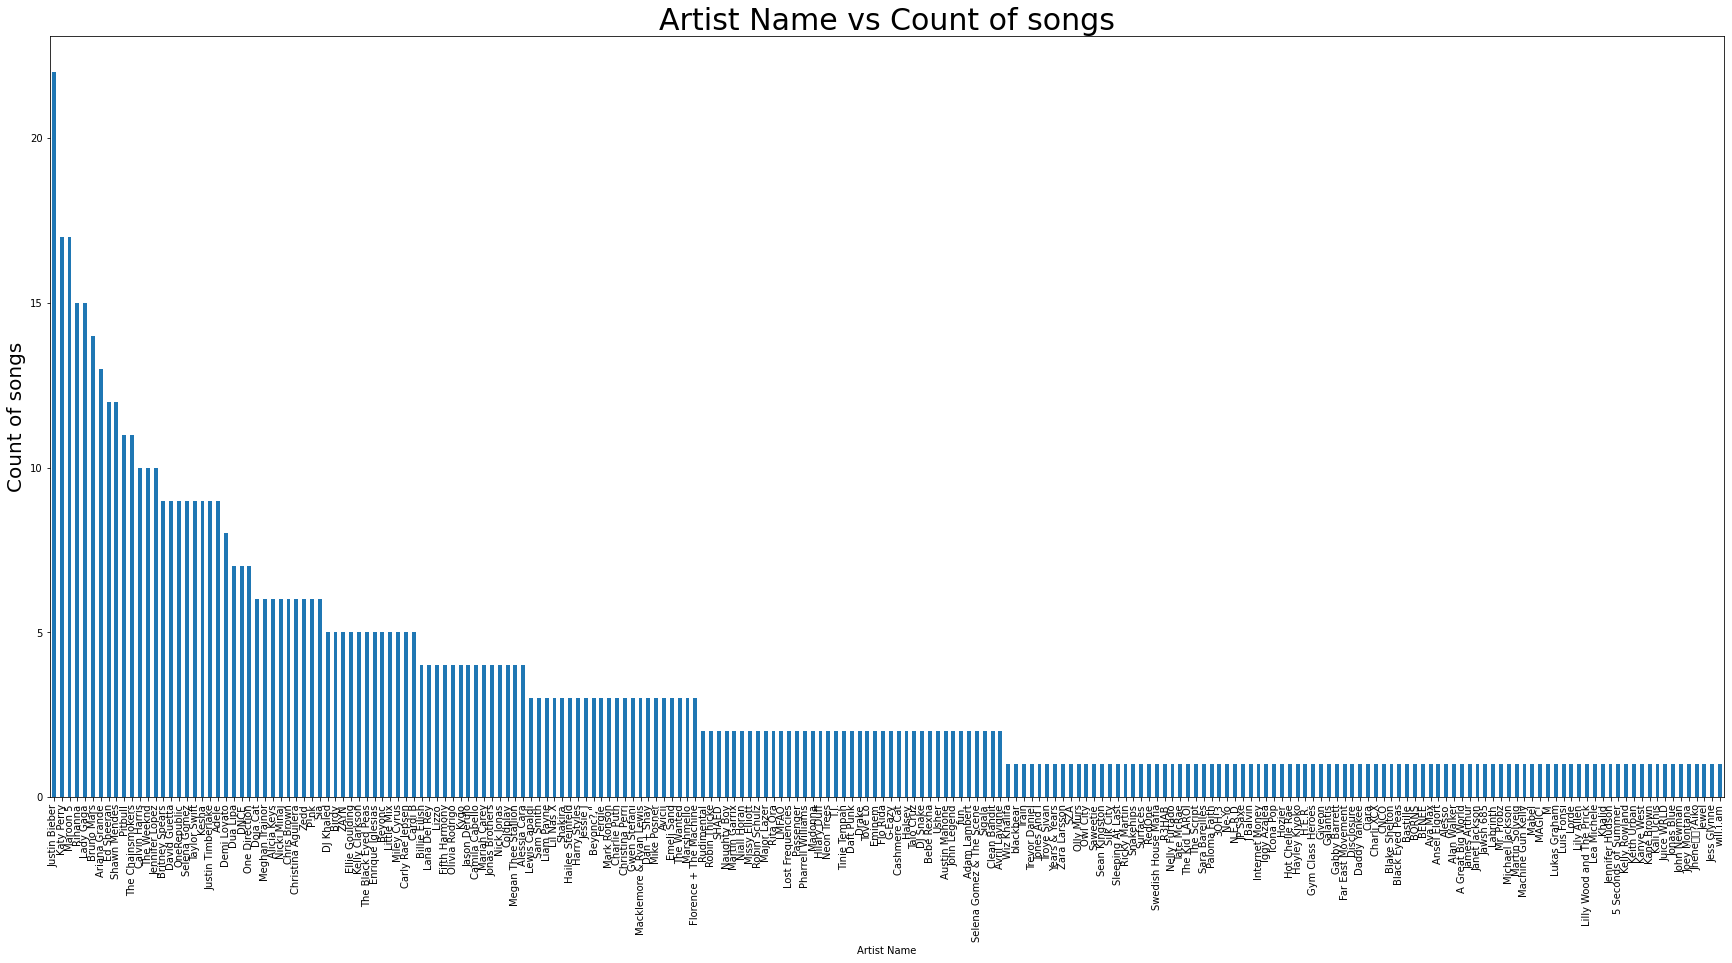

In [17]:
fig = plt.figure(figsize = (30,14))
df.groupby('artist')['title'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist Name', fontsize = 10)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

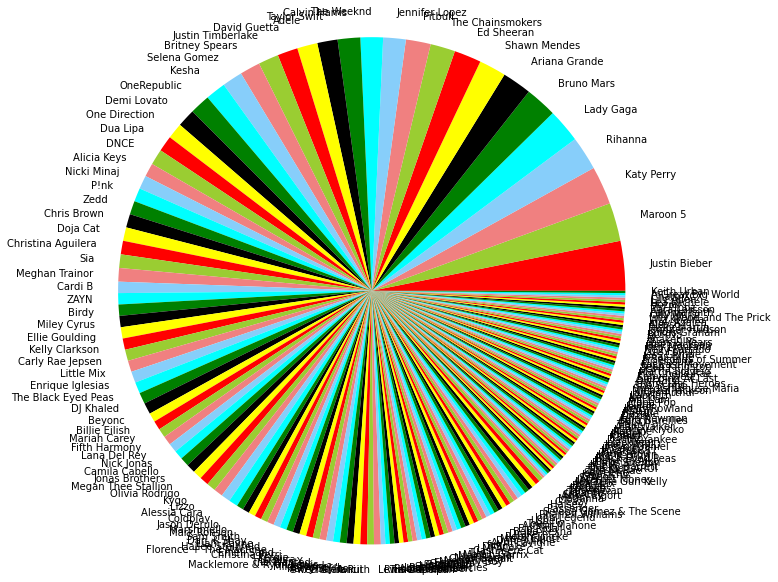

In [18]:
labels = df.artist.value_counts().index
sizes = df.artist.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct=('%1.1f%%')
plt.axis('equal')
plt.show()

<AxesSubplot:title={'center':'Correlation heatmap'}>

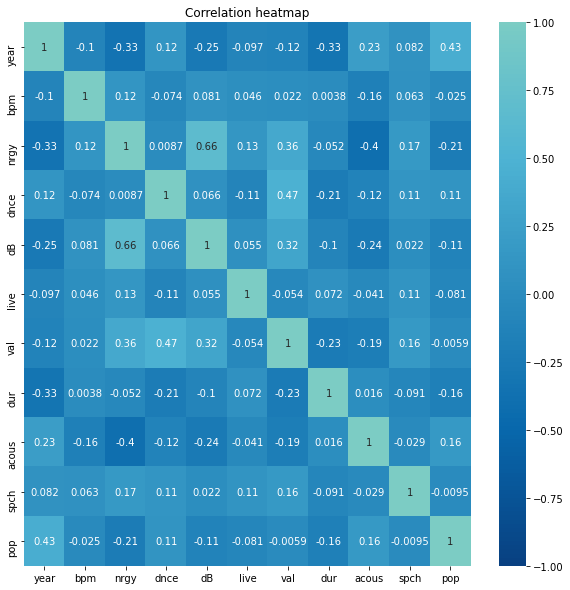

In [19]:
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(correlation,annot=True,vmin=-1,vmax=1,cmap="GnBu_r",center=1)

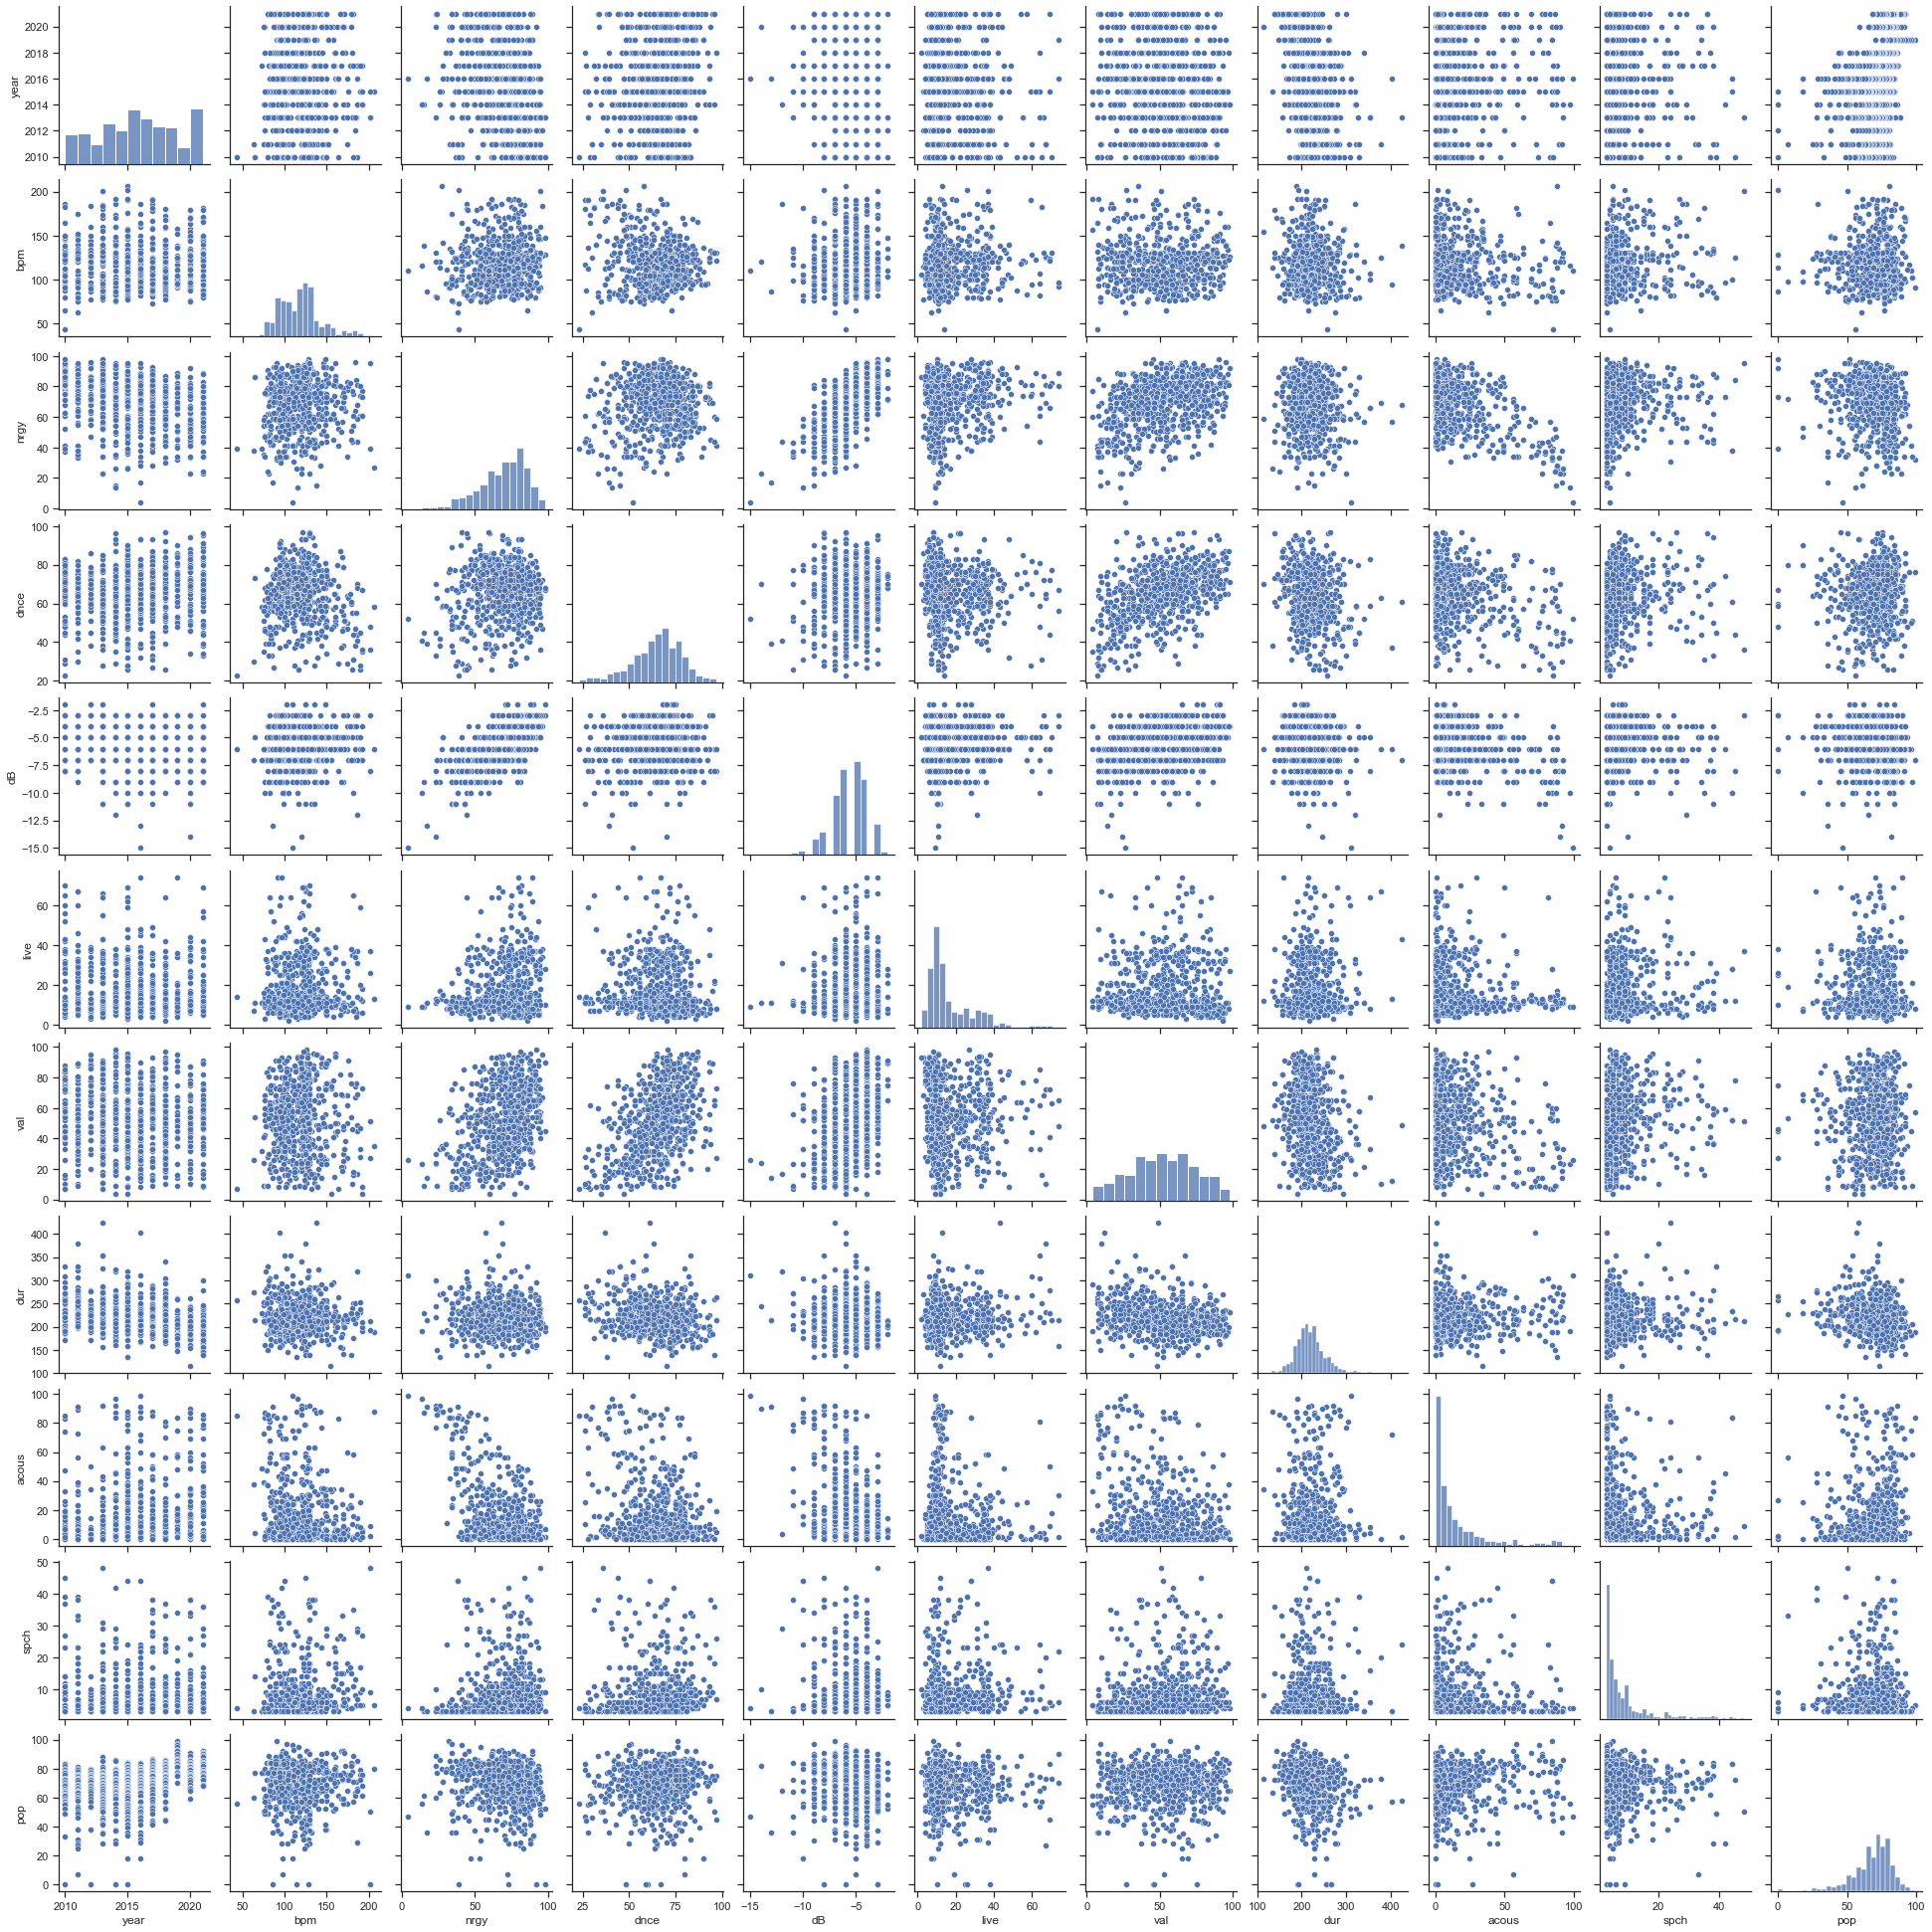

In [20]:
sns.set_theme(style="ticks")
sns.pairplot(df)

### 2. Choose and Train a Model

#### 2.1 Since we are dealing with a classification problem, several models will be tried:

1. Random Forest
2. Naive Bayes
3. Stochastic Gradient Descent Classifier
4. Logistic Regression

In [21]:
# Let's reduce our data to only the features we need and the target.
# The features we chose have similar 'count' values when we describe() them
# We need to keep the target as part of our DataFrame for now.
selected_columns = ['top_genre', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']

# Create our new training set containing only the features we want
prepared_data = df[selected_columns]


prepared_data.describe(include='all') #Note there are no empty values.

top_genre      bpm     nrgy     dnce       dB     live      val  \
count         696  696.000  696.000  696.000  696.000  696.000  696.000   
unique         59      NaN      NaN      NaN      NaN      NaN      NaN   
top     dance pop      NaN      NaN      NaN      NaN      NaN      NaN   
freq          362      NaN      NaN      NaN      NaN      NaN      NaN   
mean          NaN  119.217   69.154   64.927   -5.621   17.687   51.907   
std           NaN   24.886   16.352   13.363    1.773   12.992   22.250   
min           NaN   43.000    4.000   23.000  -15.000    2.000    4.000   
25%           NaN  100.000   59.000   57.000   -7.000    9.000   35.000   
50%           NaN  120.000   72.000   67.000   -5.000   12.000   52.000   
75%           NaN  130.000   81.000   74.000   -4.000   23.250   68.000   
max           NaN  206.000   98.000   97.000   -2.000   74.000   98.000   

            dur    acous     spch      pop  
count   696.000  696.000  696.000  696.000  
unique      NaN      NaN      NaN      NaN  
top         NaN      NaN      NaN      NaN  
freq        NaN      NaN      NaN      NaN  
mean    220.810   15.716    8.557   68.401  
std      35.308   21.719    7.676   14.231  
min     115.000    0.000    3.000    0.000  
25%     199.000    2.000    4.000   62.000  
50%     217.000    7.000    6.000   71.000  
75%     236.250   20.000    9.250   78.000  
max     424.000   99.000   48.000   99.000

In [22]:
# Separate out the prediction target
y = prepared_data['top_genre']

# Drop the target column (axis=1) from the original dataframe and use the rest as our feature data
X = prepared_data.drop('top_genre', axis=1)

# Take a look at the data again

X.head()

bpm  nrgy  dnce  dB  live  val  dur  acous  spch  pop
0   97    89    67  -4     8   80  217     19     4   83
1   87    93    75  -5    52   64  263     24    23   82
2  120    84    76  -3    29   71  200     10    14   80
3  119    92    70  -4     8   71  295      0     4   79
4  109    84    64  -5     9   43  221      2     4   78

In [25]:
# The labels need to be converted into a form that can be understood by the models
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
encoded_Y

array([52, 32, 30, 30, 56, 23, 30, 30, 43, 10, 30, 56, 30, 30, 30,  5, 30,
       30, 30, 30, 30,  9, 30, 56, 30, 46, 30, 30, 30, 30, 30, 30, 30, 30,
       43, 30, 30,  9, 30,  4, 30, 43, 10, 27, 30, 30, 30,  5,  5, 30, 14,
       30, 17, 30, 56, 17, 30, 56, 30, 56, 30, 23, 30, 26, 56, 30, 30, 30,
        9, 30, 30, 30, 10, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       10, 30, 30, 30, 30, 30, 10, 10, 30, 30,  5,  0, 30, 30, 30, 30, 30,
       30, 30, 30, 56, 55, 56, 16, 56, 23, 30, 17, 56, 30, 30, 30, 56, 56,
       16, 23, 30, 11, 23, 30,  9, 10, 30, 30, 30, 30, 30, 11, 10, 30, 10,
       30, 56, 30, 30, 14, 16, 30, 25, 30, 30, 14, 35, 30, 56, 30, 30, 56,
       30, 28,  4, 30, 46, 21, 16, 16, 30, 35, 30,  0, 30, 30, 56, 30, 30,
       30, 30, 30, 30, 24, 30, 56, 56, 30, 30, 16, 23, 23, 30, 30, 30, 30,
       43, 30, 30, 30, 16, 55, 30, 30, 30, 30, 30, 16, 30, 30, 30, 30, 30,
       30, 10, 30,  1, 30,  5, 52, 56, 30, 30, 56, 56, 30, 14, 56, 56, 40,
       30, 50,  4, 56, 45

first preparing the training and testing dataset with proper standardization using StandardScaler

In [26]:
train_X, test_X, train_y, test_y = train_test_split(X, encoded_Y, random_state = 0, test_size=0.25) 
print(f'Number of training values: {len(train_y)}')                
print(f'Number of testing values: {len(test_y)}')

standard_scaler = StandardScaler().fit(train_X)

# Standard Scaler
X_train_ST = standard_scaler.transform(train_X)
X_test_ST = standard_scaler.transform(test_X)

Number of training values: 522
Number of testing values: 174


Now creating the instances of the models

In [27]:
# # obtaining all unique classes
# unique = np.unique(train_y)

# from sklearn.preprocessing import label_binarize
# from sklearn.preprocessing import LabelEncoder
# # 1 hot encoding
# y_test_1hot = label_binarize(test_y, classes = unique)
# y_train_1hot = label_binarize(train_y, classes = unique)

# # labelling
# y_test_label = LabelEncoder()

In [28]:
models = []
models += [['Naive Bayes', GaussianNB()]]
models += [['SGD', OneVsOneClassifier(SGDClassifier())]]
models += [['Logistic', LogisticRegression(multi_class = 'ovr')]]
rand_forest = RandomForestClassifier(random_state = 42, min_samples_split = 5)

Now training the models using k cross validation

In [29]:
result_ST =[]
kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

# Random Forest has to be done separately since it takes in one hot encoded labels instead
RF_cross_val_score = cross_val_score(rand_forest, X_train_ST, train_y, cv = 10, scoring = 'accuracy')
print('%s: %f (%f)' % ('Random Forest', RF_cross_val_score.mean(), RF_cross_val_score.std()))

for name, model in models:
    cv_score = cross_val_score(model, X_train_ST, train_y, cv = kfold, scoring = 'accuracy')
    result_ST.append(cv_score)
    print('%s: %f (%f)' % (name,cv_score.mean(), cv_score.std()))

Random Forest: 0.571045 (0.027094)
Naive Bayes: 0.436901 (0.053383)
SGD: 0.475000 (0.044928)
Logistic: 0.544194 (0.031945)


All of our models have very low accuracy, which is most likely due to the lack of available data and the unbalanced distribution of data sample. Let's move forward, and select some specific models.

#### 2.2 Decision Tree and Random Forest
We're going to use a Decision Tree Classifier and a Random Forest Classifier. These models make categorical predictions instead of continuous numerical predictions, which is perfect for predicting genres.

In [30]:
def besttdepth(train_X, val_X, train_y, val_y):
    '''
    This is a function to determine the best depth for a Decision Tree Classifier. 
       This is an alternative to the mean absolute error used for regressors          
       '''
    maxnodes = {i:0 for i in range(1,10)}
    for i in maxnodes:
        genrepred = DecisionTreeClassifier(max_depth=i)
        genrepred.fit(train_X, train_y)
        for j in range(len(genrepred.predict(val_X))):
            if genrepred.predict(val_X)[j] == val_y[j]:
                maxnodes[i] += 1
    best = 0
    score = 0
    for i in maxnodes:
        if maxnodes[i] > score:
            best = i
            score = maxnodes[i]
    print(maxnodes)
    return best

In [31]:
# Create a decision tree classifier with best depth
bestd = besttdepth(X_train_ST, X_test_ST, train_y, test_y)
print("best depth is: ", bestd)
genrepred = DecisionTreeClassifier(max_depth=bestd) #replace bestd with 1 to get a faster running time

genrepred.fit(train_X, train_y)

{1: 84, 2: 86, 3: 84, 4: 85, 5: 83, 6: 81, 7: 72, 8: 73, 9: 75}
best depth is:  2


DecisionTreeClassifier(max_depth=2)

The dictionary printed above shows the depth of the tree compared with the number of correct predictions. A depth of 2 has the best success rate, with 86/174 (49.4%). Generally, the deeper the tree, the lower success rate. You may also notice that the genre dance pop has the same percentage of values as the success rate of a tree depth of 1 - 54%.

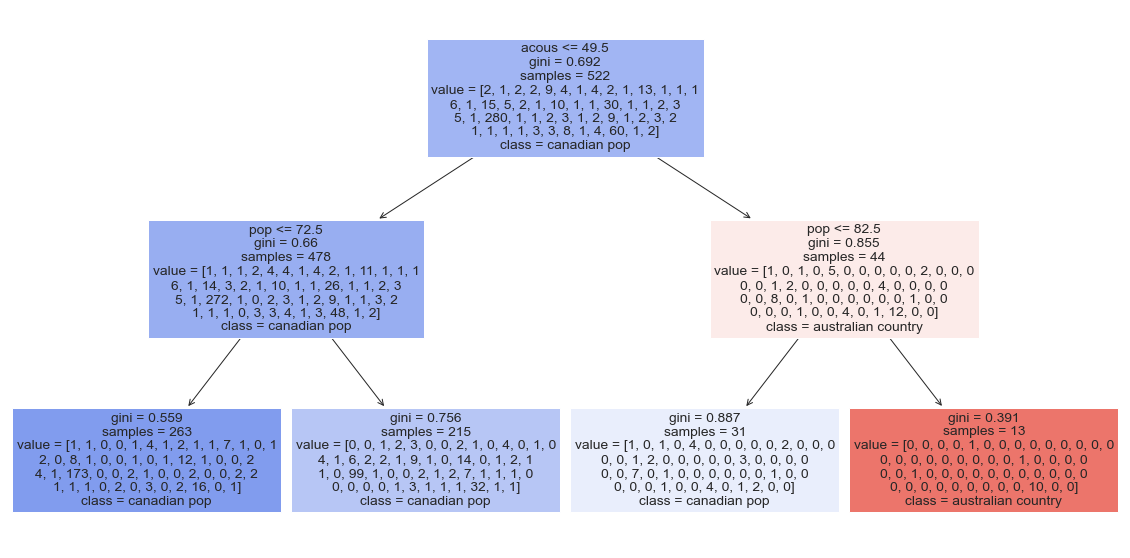

In [32]:
plt.figure(figsize = (20,10))
plot_tree(genrepred,
          feature_names=X.columns,
          class_names=['big room', 'british soul', 'hollywood', 'atl hip hop', 'contemporary country', 'hip pop', 
         'downtempo', 'edm', 'moroccan pop', 'canadian hip hop', 'chicago rap', 'tropical house', 
         'alt z', 'nz pop', 'australian pop', 'detroit hip hop', 'alaska indie', 'black americana', 
         'celtic rock', 'folk-pop', 'belgian edm', 'australian dance', 'rap', 'electronic trap', 
         'escape room', 'colombian pop', 'australian hip hop', 'cali rap', 'french indie pop', 
         'neo mellow', 'canadian pop', 'irish singer-songwriter', 'baroque pop', 'danish pop', 
         'dance pop', 'electro', 'electro house', 'hip hop', 'alternative r&b', 'art pop', 
         'barbadian pop', 'pop', 'electropop', 'ohio hip hop', 'complextro', 'house', 'brostep', 
         'candy pop', 'canadian latin', 'lgbtq+ hip hop', 'metropopolis', 'australian country', 
         'indie pop', 'boy band', 'canadian contemporary r&b', 'bedroom soul', 'acoustic pop', 
         'latin', 'permanent wave'],
          filled=True)
plt.show()

As shown in the visulisation, 'pop' (popularity) and 'acous' (Acousticness)has the biggest effect on determining the genre.

In [34]:
forestgenrepred = RandomForestClassifier(random_state=1)

# Train the model on the one hot encoded data
forestgenrepred.fit(X_train_ST, train_y)



best = 0
test_X.head()

for i in range(len(forestgenrepred.predict(X_test_ST))):
    #print(genrepred.predict(val_X)[i], '\t', val_y.values[i])
    if forestgenrepred.predict(X_test_ST)[i] == test_y[i]:
        best += 1
print(f'correct genre RandomForest predicts: {best}')
print(best/len(test_y))

correct genre RandomForest predicts: 95
0.5459770114942529


the prediction of Random Forest Classifier is 54.6%

#### 2.2.1 Evaluate model performance

As shown above, the reults are:

Decision Tree Classifier (tree depth of 2): 86/174 (49.4% success rate)
Random Forest Classifier: 95/174 (54.6% success rate)
As seen, the Random Forest Classifier has a higher success rate, but not by much.

My guess of why the results are not improved by much are because of best tree depth of 2. This means that the random forest doesn't have many options to chose from when selecting potential trees.

#### 2.3 Neural network model

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import np_utils

In [37]:
dummy_y = np_utils.to_categorical(encoded_Y)
dummy_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
model = Sequential()
model.add(Dense(1000, input_shape=(X.shape[1],), activation='relu')) # input shape is (features,)
model.add(Dense(59, activation='softmax'))
model.summary()

# compile the model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              11000     
                                                                 
 dense_1 (Dense)             (None, 59)                59059     
                                                                 
Total params: 70,059
Trainable params: 70,059
Non-trainable params: 0
_________________________________________________________________


In [39]:
import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                   mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model.fit(X_train_ST,
                    dummy_y,
                    callbacks=[es],
                    epochs=10000,
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10000
42/42 [==============================] - 0s 4ms/step - loss: 2.6905 - accuracy: 0.5420 - val_loss: 2.5602 - val_accuracy: 0.5143
Epoch 2/10000
42/42 [==============================] - 0s 1ms/step - loss: 2.0010 - accuracy: 0.5683 - val_loss: 2.6825 - val_accuracy: 0.5143
Epoch 3/10000
42/42 [==============================] - 0s 1ms/step - loss: 1.8493 - accuracy: 0.5707 - val_loss: 2.8720 - val_accuracy: 0.5143
Epoch 4/10000
42/42 [==============================] - 0s 1ms/step - loss: 1.7480 - accuracy: 0.5683 - val_loss: 3.0501 - val_accuracy: 0.5143
Epoch 5/10000
42/42 [==============================] - 0s 1ms/step - loss: 1.6639 - accuracy: 0.5683 - val_loss: 3.2647 - val_accuracy: 0.5143
Epoch 6/10000
42/42 [==============================] - 0s 1ms/step - loss: 1.5840 - accuracy: 0.5707 - val_loss: 3.5286 - val_accuracy: 0.5143
Epoch 7/10000
42/42 [==============================] - 0s 1ms/step - loss: 1.5265 - accuracy: 0.5659 - val_loss: 3.6799 - val_accuracy: 0.5048

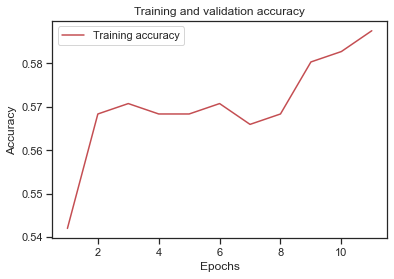

In [40]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [41]:
preds = model.predict(X) 
print(preds[0]) 
print(np.sum(preds[0]))


matrix = confusion_matrix(dummy_y.argmax(axis=1), preds.argmax(axis=1))
matrix

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
print(classification_report(dummy_y.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00        15
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00        16
          17       0.00    

In [43]:
from sklearn.metrics import f1_score
print('f1 score with weighted average: ', f1_score(dummy_y.argmax(axis=1), preds.argmax(axis=1), average='weighted'))
print('f1 score with micro average: ', f1_score(dummy_y.argmax(axis=1), preds.argmax(axis=1), average='micro'))

f1 score with weighted average:  0.3559198661538796
f1 score with micro average:  0.5201149425287356


### 3.1 Clustering test

#### we know clustering is used for non-supervised learning. However, given the condition we have various types of music genres, how many genres will algorithm suggest us? Let's take a look.

In [44]:
# Change null values

df.bpm = df.bpm.replace(0, df.bpm.mean())
df.bpm.unique()

df.loudness = df.dB.replace(-60, df.dB.mean())
df.loudness.unique()

array([ -4,  -5,  -3,  -6,  -8,  -7,  -2,  -9, -11, -12, -10, -15, -13,
       -14], dtype=int64)

In [45]:
# Replace with nominal scale dummy variable

df.drop(columns='artist', inplace=True)
df.drop(columns='year', inplace=True)
    
new_df = df
temp_df = pd.get_dummies(new_df[['top_genre']])
new_df = new_df.join(temp_df, how='left')
new_df = new_df.drop(columns = ['top_genre'], axis=1)
new_df.set_index('title', inplace=True)

In [46]:
new_df

bpm  nrgy  dnce  dB  live  val  dur  acous  \
title                                                                         
Hey, Soul Sister                  97    89    67  -4     8   80  217     19   
Love The Way You Lie              87    93    75  -5    52   64  263     24   
TiK ToK                          120    84    76  -3    29   71  200     10   
Bad Romance                      119    92    70  -4     8   71  295      0   
Just the Way You Are             109    84    64  -5     9   43  221      2   
...                              ...   ...   ...  ..   ...  ...  ...    ...   
Glad You Exist                   104    55    75  -6    12   66  145     24   
Cry Baby (feat. DaBaby)          130    44    96  -8    22   62  138      0   
All I Want for Christmas Is You  150    63    34  -7     7   35  241     16   
One Too Many                      83    54    70  -7    57   59  204     25   
You Right - Extended             129    57    84  -7    12   50  246      2   

                                 spch  pop  ...  top_genre_lgbtq+ hip hop  \
title                                       ...                             
Hey, Soul Sister                    4   83  ...                         0   
Love The Way You Lie               23   82  ...                         0   
TiK ToK                            14   80  ...                         0   
Bad Romance                         4   79  ...                         0   
Just the Way You Are                4   78  ...                         0   
...                               ...  ...  ...                       ...   
Glad You Exist                      3   72  ...                         0   
Cry Baby (feat. DaBaby)            36   72  ...                         0   
All I Want for Christmas Is You     4   69  ...                         0   
One Too Many                        7   69  ...                         0   
You Right - Extended                6   68  ...                         0   

                                 top_genre_metropopolis  \
title                                                     
Hey, Soul Sister                                      0   
Love The Way You Lie                                  0   
TiK ToK                                               0   
Bad Romance                                           0   
Just the Way You Are                                  0   
...                                                 ...   
Glad You Exist                                        0   
Cry Baby (feat. DaBaby)                               0   
All I Want for Christmas Is You                       0   
One Too Many                                          0   
You Right - Extended                                  0   

                                 top_genre_moroccan pop  top_genre_neo mellow  \
title                                                                           
Hey, Soul Sister                                      0                     1   
Love The Way You Lie                                  0                     0   
TiK ToK                                               0                     0   
Bad Romance                                           0                     0   
Just the Way You Are                                  0                     0   
...                                                 ...                   ...   
Glad You Exist                                        0                     0   
Cry Baby (feat. DaBaby)                               0                     0   
All I Want for Christmas Is You                       0                     0   
One Too Many                                          0                     0   
You Right - Extended                                  0                     0   

                                 top_genre_nz pop  top_genre_ohio hip hop  \
title                                                                       
Hey, Soul Sister           

In [47]:
#standardscaler
X_std = StandardScaler().fit_transform(new_df)

#Reduce Dimensions use PCA
pca = PCA(n_components=.95)
principalComponents = pca.fit_transform(X_std) # Plot the explained variances

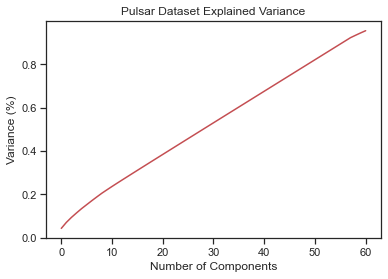

In [48]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), c='r')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [49]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
pca_df = pd.DataFrame(principalComponents)

[Text(0.5, 0, 'K'),
 Text(0, 0.5, 'sum of squared distances'),
 Text(0.5, 1.0, 'Elbow graph')]

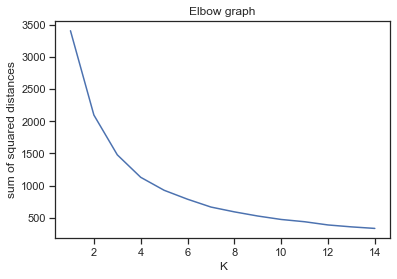

In [50]:
# Set cluster number use SSR elbow
# SSR elbow
sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    sum_of_squared_distances.append(km.inertia_)
    
ax = sns.lineplot(x=K, y = sum_of_squared_distances)
ax.set(xlabel='K', ylabel='sum of squared distances', title='Elbow graph')

#### We noticed that there 3-6 genres is the most suggested numbers we need to divid our music into. So converge different genres into a smaller number should be taken into consideration when we conduct our further work.
#### In addition to this, upsampling, downsampling, and SMOTE should be used into our data prepocessing because our data distribution is unbalanced.